In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_va = pd.read_csv("aca2_dataset_validation.csv")
df_tr = pd.read_csv("aca2_dataset_training.csv")
df_tr

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,Y,1,2,1,2,1390.500000,0.000664,1027
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,Y,2,3,2,3,890.333333,0.002545,213
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,Y,3,4,1,2,770.500000,0.001439,2078
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,Y,5,6,0,1,592.333333,0.001407,3229
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,Y,2,3,1,2,870.000000,0.005882,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,Y,2,3,2,3,969.000000,0.002959,652
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,N,3,4,1,2,770.500000,0.001439,708
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,N,1,2,0,1,1060.000000,0.000472,362
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,Y,1,2,1,2,1204.500000,0.000838,60


In [3]:
#clean data
#drop columns irrelavant to the classification analysis
df_tr = df_tr.drop(['UNIQUEID',
                    'SCHOOL',
                    'GRADE',
                    'Gender',
                    'Class',
                    'STUDENTID',
                    'CODER',
                    'OBSNUM',
                    'totalobs-forsession',
                    'TRANSITIONS',
                    'FORMATchanges',
#                     'NumACTIVITIES',
#                     'NumFORMATS',
#                     'Obsv/act',
                    'Transitions/Durations',
                    'Total Time'],
                   axis = 1)
df_tr

,Activity,ONTASK,NumACTIVITIES,NumFORMATS,Obsv/act
0,Wholecarpet,Y,2,2,1390.500000
1,Individual,Y,3,3,890.333333
2,Smallgroup,Y,4,2,770.500000
3,Wholedesks,Y,6,1,592.333333
4,Wholedesks,Y,3,2,870.000000
...,...,...,...,...,...
22179,Wholecarpet,Y,3,3,969.000000
22180,Smallgroup,N,4,2,770.500000
22181,Smallgroup,N,2,1,1060.000000
22182,Wholedesks,Y,2,2,1204.500000


In [4]:
import seaborn as sns

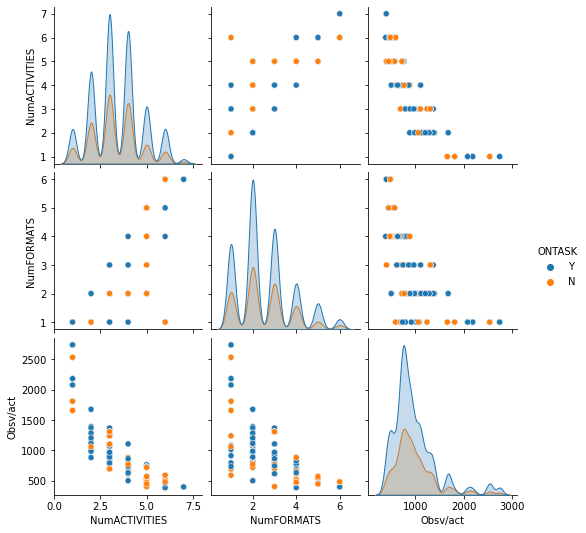

In [11]:
#generate some descriptives to help us understand data
#

sns.pairplot(df_tr, hue = "ONTASK")


<AxesSubplot:>

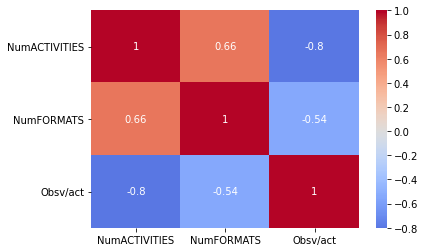

In [16]:
m=df_tr.corr().round(2)
sns.heatmap(data=m, annot=True, center=0.0, cmap='coolwarm')

In [9]:
dummy2 = pd.get_dummies(df_tr['Activity'], prefix = 'Activity') # Here prefix = 'Activity' will create new column names
dummy2_v = pd.get_dummies(df_va['Activity'], prefix = 'Activity')


In [7]:

df_train = pd.concat([df_tr,dummy2],axis = 1)
df_va = pd.concat([df_va,dummy2_v],axis = 1)

In [8]:
#prepare the dataset
#create dummy variable for ONTASK

from sklearn.linear_model import LogisticRegression
dummy1 = pd.get_dummies(df_tr['ONTASK'], prefix = 'ONTASK') # Here prefix = 'certified' will create new column names
dummy1
dummy1_v =pd.get_dummies(df_va['ONTASK'], prefix = 'ONTASK')

In [9]:
#merge the columns
df_train = pd.concat([df_train,dummy1],axis = 1)
df_va = pd.concat([df_va,dummy1_v],axis = 1)
df_train

,Activity,ONTASK,NumACTIVITIES,NumFORMATS,Obsv/act,Activity_Dancing,Activity_Individual,Activity_Smallgroup,Activity_Testing,Activity_Wholecarpet,Activity_Wholedesks,ONTASK_N,ONTASK_Y
0,Wholecarpet,Y,2,2,1390.500000,0,0,0,0,1,0,0,1
1,Individual,Y,3,3,890.333333,0,1,0,0,0,0,0,1
2,Smallgroup,Y,4,2,770.500000,0,0,1,0,0,0,0,1
3,Wholedesks,Y,6,1,592.333333,0,0,0,0,0,1,0,1
4,Wholedesks,Y,3,2,870.000000,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,Wholecarpet,Y,3,3,969.000000,0,0,0,0,1,0,0,1
22180,Smallgroup,N,4,2,770.500000,0,0,1,0,0,0,1,0
22181,Smallgroup,N,2,1,1060.000000,0,0,1,0,0,0,1,0
22182,Wholedesks,Y,2,2,1204.500000,0,0,0,0,0,1,0,1


In [10]:
#further clean the data, drop the extra columns

df_train = df_train.drop(['ONTASK', 'Activity','ONTASK_N'], axis=1)
df_train


,NumACTIVITIES,NumFORMATS,Obsv/act,Activity_Dancing,Activity_Individual,Activity_Smallgroup,Activity_Testing,Activity_Wholecarpet,Activity_Wholedesks,ONTASK_Y
0,2,2,1390.500000,0,0,0,0,1,0,1
1,3,3,890.333333,0,1,0,0,0,0,1
2,4,2,770.500000,0,0,1,0,0,0,1
3,6,1,592.333333,0,0,0,0,0,1,1
4,3,2,870.000000,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
22179,3,3,969.000000,0,0,0,0,1,0,1
22180,4,2,770.500000,0,0,1,0,0,0,0
22181,2,1,1060.000000,0,0,1,0,0,0,0
22182,2,2,1204.500000,0,0,0,0,0,1,1


In [11]:
Xs = df_train[["NumACTIVITIES","NumFORMATS","Obsv/act"]].to_numpy()
Ontask = df_train.loc[:,"ONTASK_Y"].values.reshape(-1,1)

In [12]:
trainModel1 = LogisticRegression()
trainModel1.fit(Xs,Ontask)

/Users/wendy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [13]:
#Model Evaluation
from sklearn.metrics import confusion_matrix
Xs_logit_test = df_va[["NumACTIVITIES","NumFORMATS","Obsv/act"]].to_numpy()
Actual_Y = df_va.loc[:,"ONTASK_Y"].values.reshape(-1,1)
ontask_pred_logit1 = trainModel1.predict(Xs_logit_test)
print(confusion_matrix(Actual_Y, ontask_pred_logit1))


[[   0 1849]
 [   0 3698]]


In [14]:
from sklearn.metrics import accuracy_score
ac_logit1 = accuracy_score(Actual_Y, ontask_pred_logit1)
print("The accuracy for logistic regression in sklearn is", ac_logit1*100, "%")

The accuracy for logistic regression in sklearn is 66.66666666666666 %
